In [160]:
import numpy as np
import matplotlib.pyplot as pl
import pickle5 as pickle

rad_ratio = 7.860 / 9.449
temp_ratio = 315 / 95
scale = rad_ratio * temp_ratio

output_dir = '/Users/tgordon/research/exomoons_jwst/JexoSim/output/'
filename = 'OOT_SNR_NIRSpec_BOTS_PRISM_Kepler-1513 b_2020_11_23_2232_57.pickle'
result = pickle.load(open(output_dir + filename, 'rb'))

In [122]:
result['noise_dic']['All noise']['fracNoT14_mean'] * np.sqrt(2)

In [124]:
#std = result['noise_dic']['All noise']['signal_std_mean'] / result['noise_dic']['All noise']['signal_mean_mean']
wl = result['noise_dic']['All noise']['wl']
inwl = result['input_spec_wl']
inspec = result['input_spec']
inspec_interp = np.interp(wl, inwl.value, inspec.value)

In [134]:
saturn = np.loadtxt('../data/saturn.txt', skiprows=13)

In [214]:
saturn_interp = np.interp(wl, saturn[:, 0], saturn[:, 1])
dense_wl = np.linspace(wl[0], wl[-1], 1000)
saturn_smooth_interp = np.interp(dense_wl, saturn[:, 0], saturn[:, 1])
spec = (saturn_interp - np.mean(saturn_interp)) * scale + (0.08 ** 2)
smooth_spec = (saturn_smooth_interp - np.mean(saturn_interp)) * scale + (0.08 ** 2)

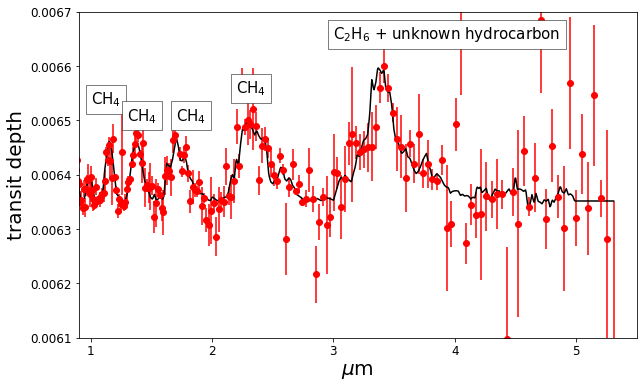

In [279]:
pl.figure(figsize=(10, 6))
pl.plot(dense_wl, smooth_spec, 'k')
rand_spec = np.random.randn(len(spec)) * onesig*1e-6 + spec
pl.errorbar(wl, rand_spec, yerr=onesig*1e-6, fmt='ro')
pl.ylim(0.0061, 0.0067)
pl.xlim(0.9, 5.5)

pl.annotate(r'$\mathrm{CH}_4$', xy=(1.0, 0.00653), xycoords='data', fontsize=15, bbox=dict(fc="white", lw=0.5, pad=5))
pl.annotate(r'$\mathrm{CH}_4$', xy=(1.3, 0.0065), xycoords='data', fontsize=15, bbox=dict(fc="white", lw=0.5, pad=5))
pl.annotate(r'$\mathrm{CH}_4$', xy=(1.7, 0.0065), xycoords='data', fontsize=15, bbox=dict(fc="white", lw=0.5, pad=5))
pl.annotate(r'$\mathrm{CH}_4$', xy=(2.2, 0.00655), xycoords='data', fontsize=15, bbox=dict(fc="white", lw=0.5, pad=5))
#pl.annotate(r'$\mathrm{CH}_4$', xy=(3.0, 0.0066), xycoords='data', fontsize=15, bbox=dict(fc="white", lw=0.5, pad=5))
pl.annotate(r'$\mathrm{C}_2\mathrm{H}_6$ + unknown hydrocarbon', xy=(3.0, 0.00665), xycoords='data', fontsize=15, bbox=dict(fc="white", lw=0.5, pad=5))

pl.ylabel('transit depth', fontsize=20)
pl.xlabel(r'$\mu$m', fontsize=20)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)

pl.savefig('/Users/tgordon/Desktop/saturn_spec_scaled.pdf')

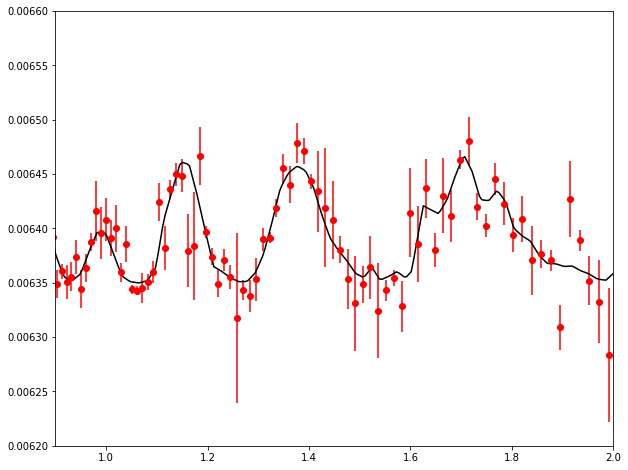

In [224]:
pl.figure(figsize=(10, 8))
pl.plot(dense_wl, smooth_spec, 'k')
rand_spec = np.random.randn(len(spec)) * onesig*1e-6 + spec
pl.errorbar(wl, rand_spec, yerr=onesig*1e-6, fmt='ro')
pl.ylim(0.0062, 0.0066)
pl.xlim(0.9, 2)
pl.savefig('/Users/tgordon/Desktop/saturn_spec_scaled_zoomed.pdf')